In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '/users/PHS0336/medirz90/github/LSSutils')

In [3]:
from lssutils.theory.cell import Spectrum, init_sample
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline as IUS
from scipy.integrate import romberg
import numpy as np

In [4]:
import nbodykit.cosmology as cosmology

In [5]:
cosmo = cosmology.Planck15

In [9]:
chi = cosmo.comoving_distance

In [10]:
z, b, dNdz = init_sample('lrg')

lrg


In [63]:
nz_spl = IUS(z, dNdz, ext=1)

(0.1, 1.5)

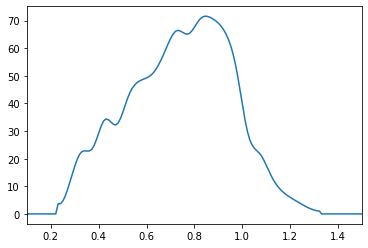

In [128]:
plt.plot(z, dNdz)
plt.xlim(0.1, 1.5)

In [130]:
dNdz_norm = quad(nz_spl, 0.1, 1.5)[0]
dNdz_norm

/tmp/slurmtmp.23924394/ipykernel_196264/3729171374.py:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  dNdz_norm = quad(nz_spl, 0.1, 1.5)[0]


39.78059587641965

In [24]:
from scipy.integrate import quad

In [155]:
s = 0.999
z_g = np.linspace(0.1, 1.5, 140)
w_mag = np.zeros(z_g.size)*np.nan

for i, z_i in enumerate(z_g):
    
    intg = IUS(z, (dNdz/dNdz_norm) * chi(z) * (chi(z_i) - chi(z)) / chi(z_i), ext=1)
    w_mag[i] = quad(intg, z_i, 1.5, limit=100)[0]

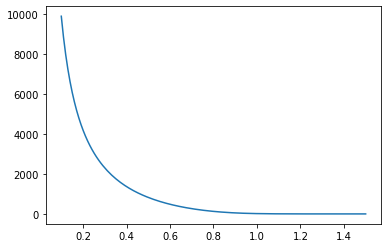

In [151]:
plt.plot(z_g, abs(w_mag))
#plt.ylim(-1000, 100)